Importing the Required Libraries

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Data Collection and Processing

In [11]:
# Loading the csv file to a Pandas DataFrame

heart_data = pd.read_csv(r"C:\Users\hp\Downloads\heart.csv")

Dataset Shape: (1025, 14)

Missing Values:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Target Value Counts:
 target
1    526
0    499
Name: count, dtype: int64


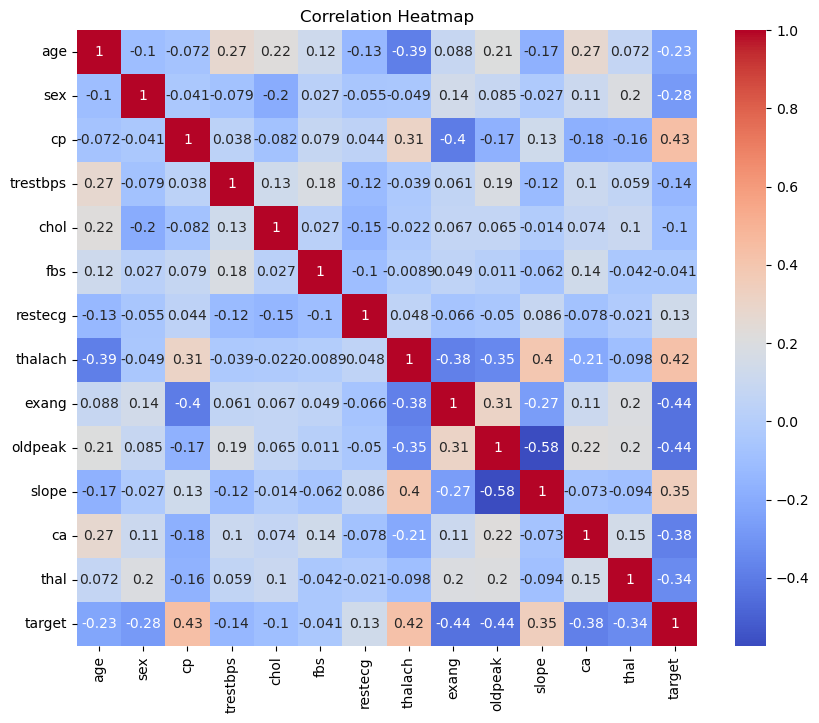

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Dataset Info
print("Dataset Shape:", heart_data.shape)
print("\nMissing Values:\n", heart_data.isnull().sum())
print("\nTarget Value Counts:\n", heart_data['target'].value_counts())

# Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(heart_data.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# Splitting Features and Target
X = heart_data.drop(columns='target', axis=1)
Y = heart_data['target']

# Train-Test Split
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, stratify=Y, random_state=2
)



LOGISTIC REGRESSION

Logistic Regression
Test Accuracy: 81.46%

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.75      0.80       100
           1       0.79      0.88      0.83       105

    accuracy                           0.81       205
   macro avg       0.82      0.81      0.81       205
weighted avg       0.82      0.81      0.81       205



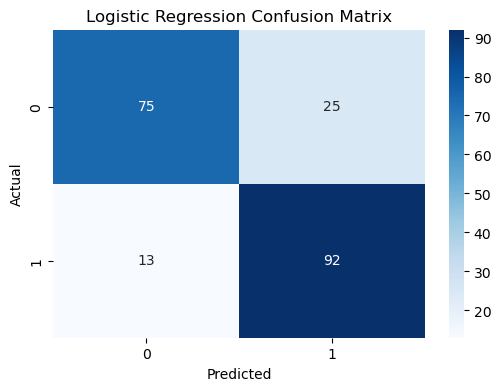

In [13]:
# Logistic Regression
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, Y_train)

log_test_pred = log_model.predict(X_test)
log_test_acc = accuracy_score(Y_test, log_test_pred)

print("Logistic Regression")
print(f"Test Accuracy: {log_test_acc * 100:.2f}%")
print("\nClassification Report:\n", classification_report(Y_test, log_test_pred))

# Confusion Matrix for Logistic
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(Y_test, log_test_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


LINEAR REGRESSION

Linear Regression used for Classification
Test Accuracy : 80.49%
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.71      0.78       100
           1       0.76      0.90      0.82       105

    accuracy                           0.80       205
   macro avg       0.82      0.80      0.80       205
weighted avg       0.81      0.80      0.80       205



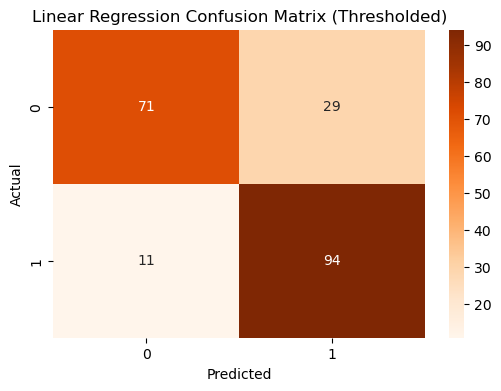

In [14]:
# Linear Regression 
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

lin_test_pred = lin_model.predict(X_test)

# Convert predicted probabilities to class labels (0 or 1)
lin_test_pred_bin = np.where(lin_test_pred >= 0.5, 1, 0)

lin_test_acc = accuracy_score(Y_test, lin_test_pred_bin)

print("Linear Regression used for Classification")
print(f"Test Accuracy : {lin_test_acc*100:.2f}%")
print("Classification Report:\n", classification_report(Y_test, lin_test_pred_bin))

# Confusion Matrix for Linear
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(Y_test, lin_test_pred_bin), annot=True, fmt='d', cmap='Oranges')
plt.title("Linear Regression Confusion Matrix (Thresholded)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


SUPPORT VECTOR MACHINE CLASSIFIER 

Support Vector Machine (SVM)
Test Accuracy: 82.44%

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.72      0.80       100
           1       0.78      0.92      0.84       105

    accuracy                           0.82       205
   macro avg       0.84      0.82      0.82       205
weighted avg       0.84      0.82      0.82       205



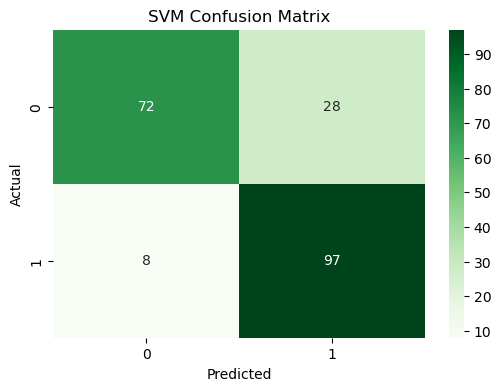

In [15]:
# Support Vector Machine (SVM)
from sklearn.svm import SVC
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, Y_train)

svm_test_pred = svm_model.predict(X_test)
svm_test_acc = accuracy_score(Y_test, svm_test_pred)

print("Support Vector Machine (SVM)")
print(f"Test Accuracy: {svm_test_acc*100:.2f}%")
print("\nClassification Report:\n", classification_report(Y_test, svm_test_pred))

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(Y_test, svm_test_pred), annot=True, fmt='d', cmap='Greens')
plt.title("SVM Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

DECISION TREE CLASSIFIER

Decision Tree Classifier
Test Accuracy: 100.00%

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      1.00      1.00       105

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205



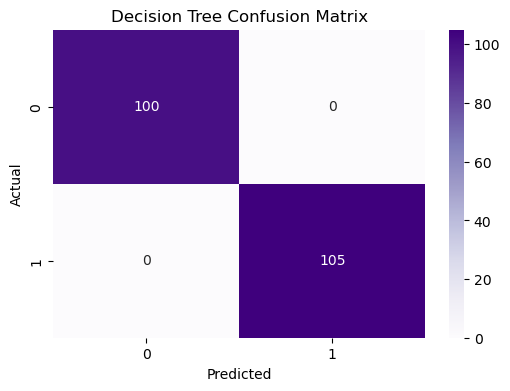

In [16]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
tree_model = DecisionTreeClassifier(random_state=2)
tree_model.fit(X_train, Y_train)

tree_test_pred = tree_model.predict(X_test)
tree_test_acc = accuracy_score(Y_test, tree_test_pred)

print("Decision Tree Classifier")
print(f"Test Accuracy: {tree_test_acc*100:.2f}%")
print("\nClassification Report:\n", classification_report(Y_test, tree_test_pred))

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(Y_test, tree_test_pred), annot=True, fmt='d', cmap='Purples')
plt.title("Decision Tree Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

RANDOM FOREST CLASSIFIER 

Random Forest Classifier
Test Accuracy: 100.00%

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      1.00      1.00       105

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205



Text(50.722222222222214, 0.5, 'Actual')

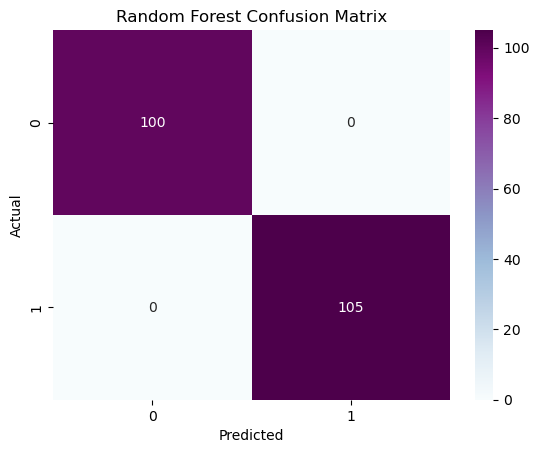

In [17]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=2)
rf_model.fit(X_train, Y_train)
rf_test_pred = rf_model.predict(X_test)

rf_test_acc = accuracy_score(Y_test, rf_test_pred)

print("Random Forest Classifier")
print(f"Test Accuracy: {rf_test_acc*100:.2f}%")
print("\nClassification Report:\n", classification_report(Y_test, rf_test_pred))
sns.heatmap(confusion_matrix(Y_test, rf_test_pred), annot=True, fmt='d', cmap='BuPu')
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")